In [22]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pylab as plt

In [28]:
KANAS = (u'あいうえおかきくけこさしすせそたちつてとなにぬねのはひふへほ'
         u'まみむめもやゆよらりるれろわゐんゑを'
         u'abcdefghijklmnopqrstuvwxyz1234567890'
         u'♡ーずぐ')

[16, 16, 10]
く
(16, 16, 10)
1.0
[16, 16, 10]
l
(16, 16, 10)
1.0
[16, 16, 10]
h
(16, 16, 10)
1.0
[16, 16, 10]
b
(16, 16, 10)
1.0
[16, 16, 10]
y
(16, 16, 10)
1.0


/Users/tushuhei/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


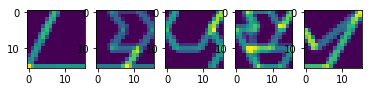

In [37]:
record_iterator = tf.python_io.tf_record_iterator(path='/tmp/strokes.tfrecords')
for i, string_record in enumerate(list(record_iterator)[-5:]):
    
    example = tf.train.Example()
    example.ParseFromString(string_record)
    
    img_string = (example.features.feature['image']
                                  .bytes_list
                                  .value[0])
    img_shape = (example.features.feature['shape']
                                  .int64_list
                                  .value)
    print(img_shape)
    label = (example.features.feature['label']
                                .int64_list
                                .value[0])
    print(KANAS[label])
    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape(img_shape) / 255.
    print(reconstructed_img.shape)
    print(np.max(reconstructed_img))
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.mean(reconstructed_img, axis=-1))
    
#    annotation_1d = np.fromstring(annotation_string, dtype=np.uint8)
    
    # Annotations don't have depth (3rd dimension)
#    reconstructed_annotation = annotation_1d.reshape((height, width))
    
#    reconstructed_images.append((reconstructed_img, reconstructed_annotation))

In [39]:
from tensorflow.contrib import slim
record_iterator = tf.python_io.tf_record_iterator(path='/tmp/strokes.tfrecords')
keys_to_features = {
      'image': tf.FixedLenFeature((), tf.string, default_value=''),
      'label': tf.FixedLenFeature([], tf.int64,
        default_value=tf.zeros([], dtype=tf.int64)),
  }

items_to_handlers = {
      'image': slim.tfexample_decoder.Image(),
      'label': slim.tfexample_decoder.Tensor('label'),
  }

items_to_descriptions = {
      'image': 'This is image',
      'label': 'This is label',
  }

In [40]:
decoder = slim.tfexample_decoder.TFExampleDecoder(
      keys_to_features, items_to_handlers)

In [43]:
dataset = slim.dataset.Dataset(
      data_sources='/tmp/strokes.tfrecords',
      reader=tf.TFRecordReader,
      decoder=decoder,
      num_samples=40000,
      items_to_descriptions=items_to_descriptions,
      )

In [46]:
provider = slim.dataset_data_provider.DatasetDataProvider(
      dataset, shuffle=False)

KeyError: 'image/encoded'

In [59]:
record_iterator = tf.python_io.tf_record_iterator(path='/tmp/flowers/flowers_train_00000-of-00005.tfrecord')
for row in list(record_iterator)[:1]:
    example = tf.train.Example()
    example.ParseFromString(row)
    print(example)
    img_string = (example.features.feature['image/encoded']
                                  .bytes_list
                                  .value[0])
    width = (example.features.feature['image/width']
                                  .int64_list
                                  .value[0])
    height = (example.features.feature['image/height']
                                  .int64_list
                                  .value[0])
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape([width, height, 3])
    plt.imshow(reconstructed_img)

features {
  feature {
    key: "image/class/label"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\001\000H\000H\000\000\377\342\014XICC_PROFILE\000\001\001\000\000\014HLino\002\020\000\000mntrRGB XYZ \007\316\000\002\000\t\000\006\0001\000\000acspMSFT\000\000\000\000IEC sRGB\000\000\000\000\000\000\000\000\000\000\000\000\000\000\366\326\000\001\000\000\000\000\323-HP  \000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\021cprt\000\000\001P\000\000\0003desc\000\000\001\204\000\000\000lwtpt\000\000\001\360\000\000\000\024bkpt\000\000\002\004\000\000\000\024rXYZ\000\000\002\030\000\000\000\024gXYZ\000\000\002,\000\000\000\024bXYZ\000\000\002@\000\000\000\024dmnd\000\000\002T\000\000\000pdmdd\000\000\002\304\000

/Users/tushuhei/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


ValueError: cannot reshape array of size 139394 into shape (500,257,3)

In [60]:
with tf.Graph().as_default(): 
    dataset = slim.dataset.Dataset(
      data_sources='/tmp/flowers/flowers_train_00000-of-00005.tfrecord',
      reader=tf.TFRecordReader,
      decoder=decoder,
      num_samples=1000,
      items_to_descriptions=items_to_descriptions,
      )
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(4):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()

ValueError: Tensor("zeros:0", shape=(), dtype=int64) must be from the same graph as Tensor("ParseSingleExample/ExpandDims:0", dtype=string).

あ


/Users/tushuhei/py3env/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


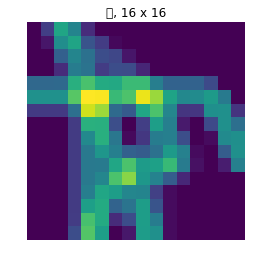

v


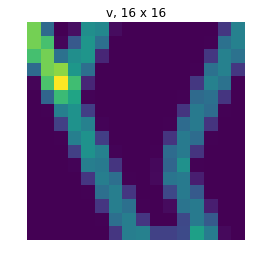

れ


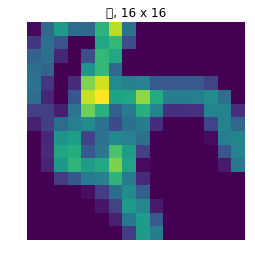

れ


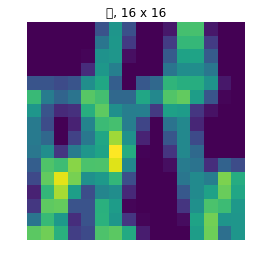

5


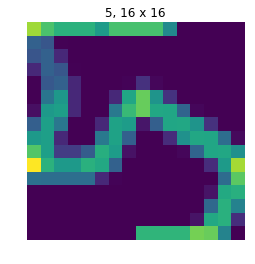

In [86]:
import os

def read_label_file(dataset_dir, filename='labels.txt'):
  """Reads the labels file and returns a mapping from ID to class name.

  Args:
    dataset_dir: The directory in which the labels file is found.
    filename: The filename where the class names are written.

  Returns:
    A map from a label (integer) to class name.
  """
  labels_filename = os.path.join(dataset_dir, filename)
  with tf.gfile.Open(labels_filename, 'rb') as f:
    lines = f.read().decode()
  lines = lines.split('\n')
  lines = filter(None, lines)

  labels_to_class_names = {}
  for line in lines:
    index = line.index(':')
    labels_to_class_names[int(line[:index])] = line[index+1:]
  return labels_to_class_names

with tf.Graph().as_default(): 
    keys_to_features = {
      'image/encoded': tf.FixedLenFeature((), tf.string, default_value=''),
      'image/format': tf.FixedLenFeature((), tf.string, default_value='raw'),
      'image/class/label': tf.FixedLenFeature(
          [], tf.int64, default_value=tf.zeros([], dtype=tf.int64)),
    }

    items_to_handlers = {
      'image': slim.tfexample_decoder.Image(),
      'label': slim.tfexample_decoder.Tensor('image/class/label'),
    }

    items_to_descriptions = {
      'image': 'This is image',
      'label': 'This is label',
    }

    decoder = slim.tfexample_decoder.TFExampleDecoder(keys_to_features, items_to_handlers)
    dataset = slim.dataset.Dataset(
      data_sources='/tmp/strokes_train.tfrecord',
      reader=tf.TFRecordReader,
      decoder=decoder,
      num_samples=40000,
      items_to_descriptions=items_to_descriptions,
      labels_to_names=,
    )
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(5):
                np_image, np_label = sess.run([image, label])
                np_image = np_image.reshape(16, 16, -1)
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                plt.figure()
                plt.imshow(np.mean(np_image, axis=-1))
                plt.title('%s, %d x %d' % (name, height, width))
                print(name)
                plt.axis('off')
                plt.show()